In [1]:
#coding utf-8
#来自kaggle titannic的tutorial：
#https://www.kaggle.com/startupsci/titanic-data-science-solutions
import pandas as pd
import numpy as np

#visualization，emmm，从例子里学，然后随差随学吧，反正可视化就是这两个把这用了
import seaborn as sns   #基于matplotlib的python数据可视化库，提供更高层次的API封装
import matplotlib.pyplot as plt
#这一行可以省略掉plt.show()这一步，在ipython中内嵌画图
%matplotlib inline      

In [2]:
#决定试一试用jupyter notebook，pycharm自带的，这个的好处是可以随便调代码，玩一玩
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
combine=[train_df,test_df]
#print (combine)

In [3]:
#刚才做的是把表单（里面有训练集和测试集）读进来，下面想看看到底都有啥特征，你可以从数据的介绍里面了解，
#也可以把columns打出来看一看
print (train_df.columns.values)     #这就显出来jupyter notebook的好处了，打印出来的就留在那，正常代码打印出来再运行就没了......

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
#下面看这个特征的分类，tutorial给了一个特征的分类（我觉得参考价值很大，但是这个分类有点迷）：
#categorical（类别特征）：
#  nominal（定类，名义变量，变量不同取值仅代表不同类的事物，性别血型这种）
#  ordinal（定序，有序类别，不仅代表分类，还代表事物按照某种特性的排序，如疗效好中差，教育程度高中低）
#  ratio（定比，有绝对0点，如质量，高度）
#  interval based（定距，变量值之间可以比较大小，两个值的差有实际意义，比如年龄，每月平均收入）
#numerical（数值特征）：
#  discrete（离散特征）
#  continuous（连续特征）
#  timeseries based（时间序列）

#这里面
#Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
#Continous: Age, Fare. Discrete: SibSp, Parch.

#这个特征可以用各种各样的办法辨别，看特征名字，还有读几行数据看看：
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_df.info()
print ("_"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [7]:
#由上可知如下信息
#  name信息可能会有错误或者打字的错误
#  ticket是字母和字母数字混合的类型组成的。Cabin是字母数字模式混合的类型。
#  Age Cabin Embarked是有缺失值的，Cabin的最多，Age的其次，Embarked的最少。（注意，缺失值和错误不一样啊！）
#  还可以看出来哪些是int型的，哪些是string(object)的

In [8]:
train_df.describe()    #进行一个快速的数据汇总，数值特征的

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.describe(percentiles=[.61, .62])      #这个可以看出来生还率大概是38%左右

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
61%,543.900000,0.000000,3.000000,32.000000,0.000000,0.000000,23.225000
62%,552.800000,1.000000,3.000000,32.000000,0.000000,0.000000,24.150000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df.describe(percentiles=[.75, .8])   #这个可以看出大部分人（>75%）都没和父母孩子一起在船上

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
80%,713.000000,1.000000,3.000000,41.000000,1.000000,1.000000,39.687500
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_df.describe(percentiles=[.68, .69])  #大约百分之三十带了兄弟姐妹和配偶

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
68%,606.200000,1.000000,3.000000,35.000000,0.000000,0.000000,26.307500
69%,615.100000,1.000000,3.000000,35.000000,1.000000,0.000000,26.550000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train_df.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]) 
#这个能看出来，65-80岁的人很少（<1%）
#买很贵很贵的票的人也很少，很少有人买四五百块的

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


In [13]:
train_df.describe(include=['O'])
#categorical feature的
#没有重名的
#男的比女的多，男的577人
#有七个人用一张票的神奇操作，就是一个票可能几个人用
#Cabin也是，类似于软卧，可能几个人用一个舱
#embarked有3个，大部分人从S港口出发

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sage, Mr. Douglas Bullen",male,347082,G6,S
freq,1,577,7,4,644


In [14]:
Assumtions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.


Correlating.

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.


Completing.

We may want to complete Age feature as it is definitely correlated to survival.
We may want to complete the Embarked feature as it may also correlate with survival or another important feature.


Correcting.

Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
PassengerId may be dropped from training dataset as it does not contribute to survival.
Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.


Creating.

We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
We may want to engineer the Name feature to extract Title as a new feature.
We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
We may also want to create a Fare range feature if it helps our analysis.


Classifying.

We may also add to our assumptions based on the problem description noted earlier.
Women (Sex=female) were more likely to have survived.
Children (Age<?) were more likely to have survived. 
The upper-class passengers (Pclass=1) were more likely to have survived.

SyntaxError: invalid syntax (<ipython-input-14-c49938979ad1>, line 1)

In [15]:
#下面各种分析都在做上面的事情
#首先，Analyze by pivoting features（我不是太懂这个什么意思）

In [16]:
#   这个表说明，这个Pclass和生还率还是关系很大的,即Pclass特征和goal很相关
#   1里面63%的人生还，2里面47%生还，3里面24%生还，这个是各自Pclass里的生还率啊，不是所有的生还的里每个Pclass占多少比率，加起来不是1！）
train_df[["Pclass","Survived"]].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [17]:
# 这个表说明了，女性的生还率非常高，Sex特征和goal很相关
train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [18]:
#这个SibSp好像有的有关系，有的没关系，所以可能得做一个新特征，比如，家庭关系
train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [19]:
#同理，这个Parch也是,有的有关系，有的没关系，所以可能得做一个新特征，比如，家庭关系
train_df[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [20]:
#下面Analyze by visualizing data。一些连续的数值特征，像年龄这种，用直方图看会比较方便

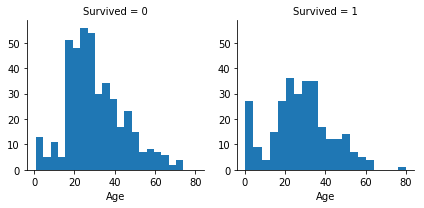

In [21]:
#年龄的图.可以看出:
#  小于4岁的小孩生还率很高
#  老人(80岁那种)都生还了
#  15-25的很多没有生还
#  大多数乘客都是15-35岁
g=sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)
# 结论:
#  Age特征要考虑
#  Age特征得补全
#  age应该弄成"年龄段"这种

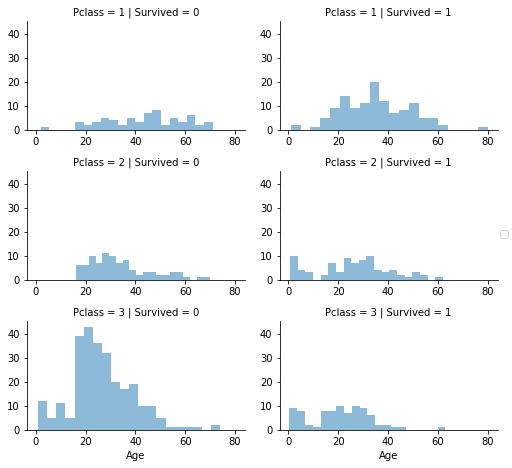

In [22]:
#这个图告诉我们：
#  Pclass是3的人最多，然而活下来的最少
#  Pclass是2和3的Infant（婴幼儿）基本都活下来了
#  Pclass=1的大部分都活下来了
#  各年龄段的都有123等级的
#结论：
# Pclass要考虑
grid=sns.FacetGrid(train_df,col='Survived',row='Pclass',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend();

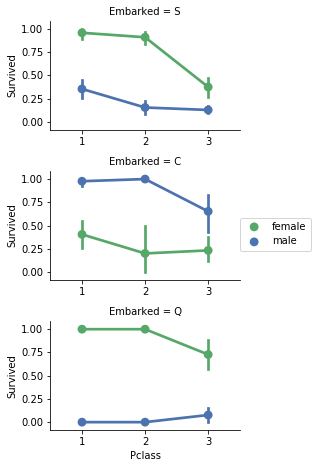

In [23]:
#下面这个图我分析不太出来他说的，但是能得到Sex和Embarked信息要加进来的结论
# Observations.
# Female passengers had much better survival rate than males. Confirms classifying (#1).
# Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
# Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
# Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).
# Decisions.
# Add Sex feature to model training.
# Complete and add Embarked feature to model training.
grid=sns.FacetGrid(train_df,row='Embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

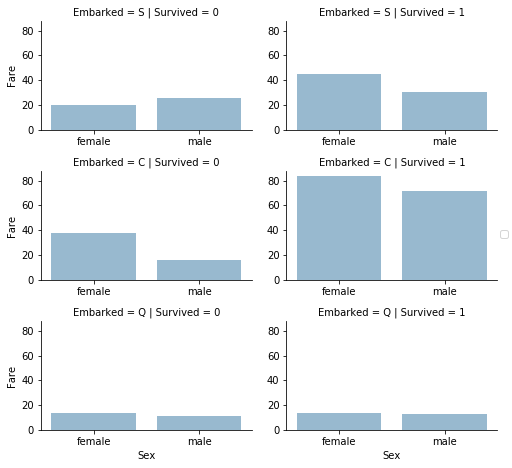

In [24]:
#下面这个图，说明fare（买票的钱）越高存活率越高
#不同的embark和fare和存活率相关，比如C港可能这个地方的Pclass=1的人多，然后Fare也多......
grid=sns.FacetGrid(train_df,row='Embarked',col='Survived',size=2.2,aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',alpha=.5,ci=None)
grid.add_legend()

In [25]:
##############上面的都还是分析，下面开始执行一些具体的correcting，creating，completing操作#############
#首先，ticket和cabin这两个特征不要了
print ("Before",train_df.shape,combine[0].shape,combine[1].shape)
train_df.drop(['Ticket','Cabin'],axis=1,inplace=True)
test_df.drop(['Ticket','Cabin'],axis=1,inplace=True)
combine=[train_df,test_df]
print ("After",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)


Before (891, 12) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [26]:
#关于名字信息，抽取出来“Title”看看能不能用。用正则表达式。([A-Za-z]+)\.这个意思是匹配XXXX.这种，XXXX是大小写字母
#那个crosstab是交叉表，按指定的行和列统计分组频数。
for dataset in combine:
    dataset["Title"]=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(train_df['Title'],train_df['Sex'])    #这里也得看下test，test里面有一个Dona，这里就没有

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [27]:
#有些title的全活下来或者全没有
train_df[["Title","Survived"]].groupby(["Title"],as_index=False).mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


In [29]:
#把那些称呼很少的都换成“Rare”，还有些同义的称呼，都换成一个
for dataset in combine:
    dataset['Title'].replace(['Lady','Countess','Capt','Col',\
                              'Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare',inplace=True)
    dataset['Title'].replace('Mlle','Miss',inplace=True)
    dataset['Title'].replace('Ms','Miss',inplace=True)
    dataset['Title'].replace('Mme','Mrs',inplace=True)
train_df[["Title","Survived"]].groupby(["Title"],as_index=False).mean()
#不同title存活率还是不一样的,联系下面不同title划分的Age band,不同title,不同age band的年龄段存活率还是有一些不一样的

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [30]:
#把Categorical换成ordinal的特征
title_mapping={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}      
for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [31]:
#这个可以看出来，这个Title可以把年龄段分的比较明白，比如那个我不知道是什么意思的Master是5岁以下的
combine[0][["Title","Age"]].groupby(["Title"],as_index=False).mean()   

,Title,Age
0,1,32.368090
1,2,21.845638
2,3,35.788991
3,4,4.574167
4,5,45.545455


In [ ]:
#上面做的事是creat了一个title的特征

In [32]:
#下面把name还有train的passengerId去掉
combine[0].drop(["Name","PassengerId"],axis=1,inplace=True)
combine[1].drop(["Name"],axis=1,inplace=True)
print (combine[0].shape)
print (combine[1].shape)

(891, 9)
(418, 9)


In [36]:
#下面把性别特征变成0和1这种
for dataset in combine:
    dataset["Sex"]=dataset["Sex"].map({"female":1,"male":0}).astype(int)
combine[0].head()
    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1
